# Detection and tracking of moving objects using background segmentation

1- Import opencv, numpy and sys packages.


In [1]:
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import sys

In [2]:
rcParams['figure.figsize'] = 20, 20

In [3]:
opencv_ver = cv2.__version__.split('.')[0]
print(f"Current version of OpenCV is {opencv_ver}")

Current version of OpenCV is 4


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


2- Download video 'M6 Motorway Traffic.mp4'
 and load it to opencv.
(For windows, if an error occurred, include this cv2.ocl.setUseOpenCL(False))

In [5]:
path = '/content/drive/MyDrive/vison-data/M6 Motorway Traffic.mp4'

In [6]:
cap = cv2.VideoCapture(path)

3- Background segmentation using OpenCV function (see workshop 'Vision par ordinateur'). Do not forget to check opencv version in order to use the appropriate functions. 

In [7]:
bg = cv2.createBackgroundSubtractorMOG2()

4- It time to apply background subtraction in order to separate background and foreground (moving object).

In [8]:
nb_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(nb_frames)

257


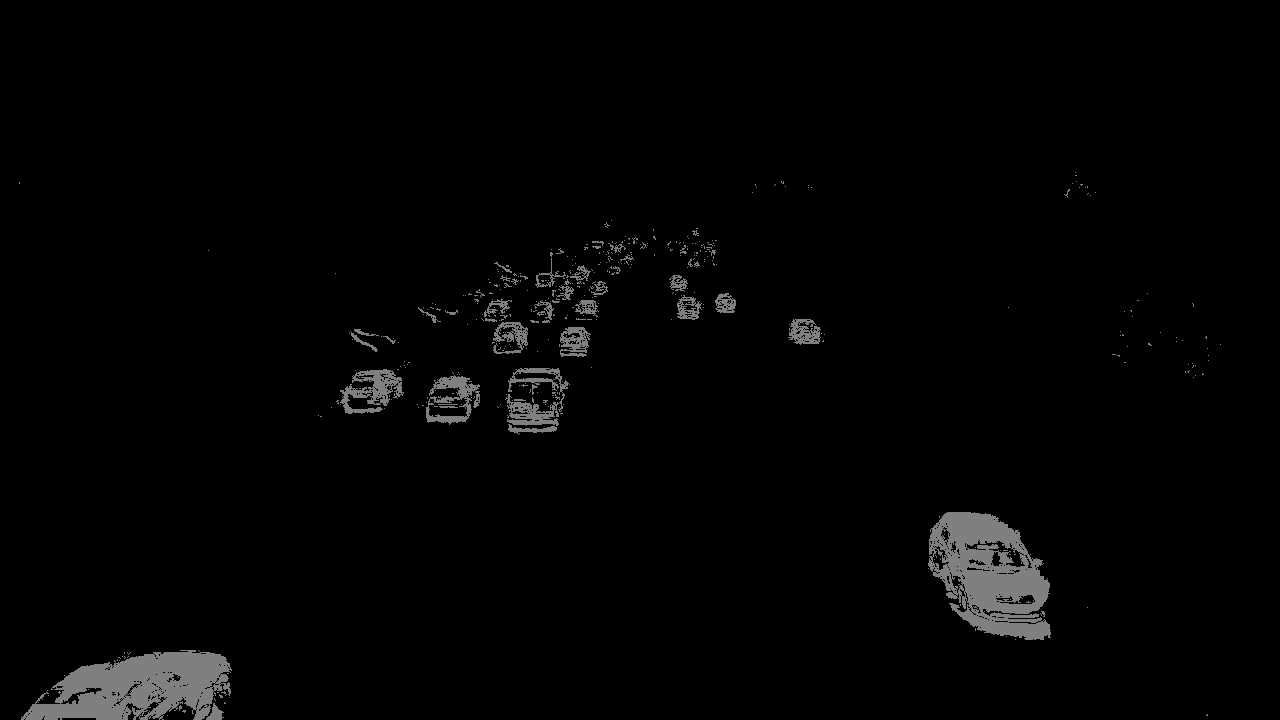

In [15]:
cap = cv2.VideoCapture(path) #capture of video
cap.set(1,3)
ret, frame = cap.read() #
bgmask = bg.apply(frame)
cv2_imshow(bgmask)

5- Apply contours on moving object. Use OpenCV and do not forget to check opencv version in order to use the appropriate functions.

In [16]:
(contours, hierarchy) = cv2.findContours(bgmask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

6- looping each contours, get bounding box from countour and than draw bounding box.


In [17]:
for c in contours:
    if cv2.contourArea(c) < 800:
        continue
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

7- Show the result and add exit key.


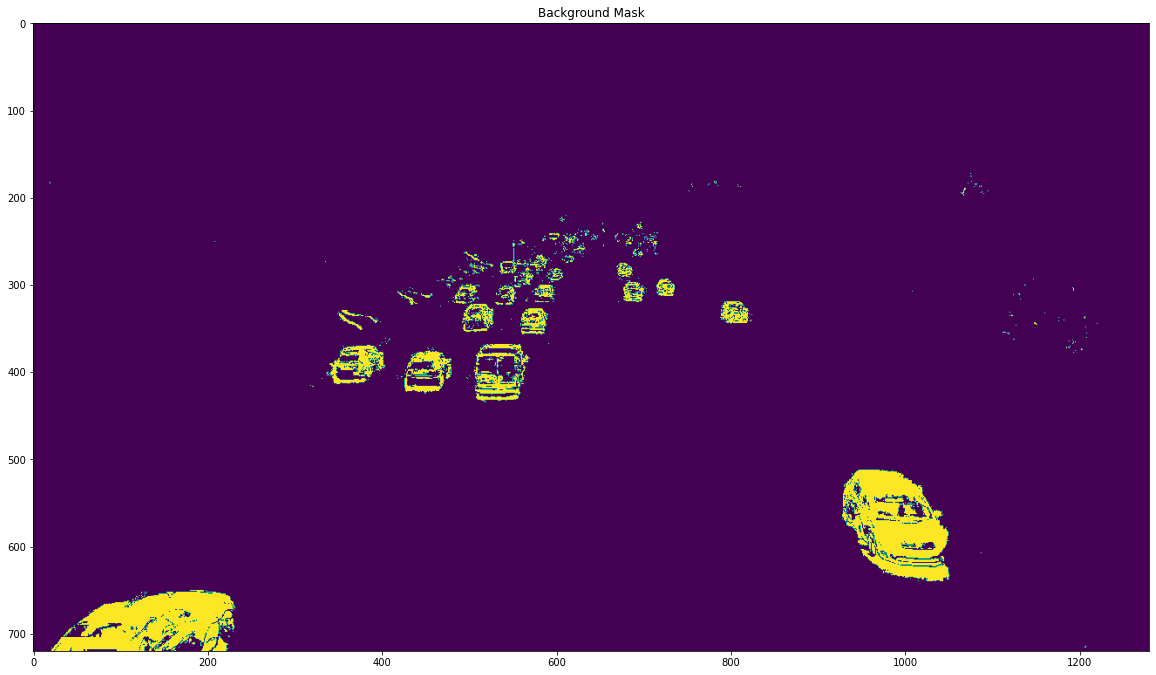

In [18]:
plt.imshow(bgmask)
plt.title("Background Mask")
plt.show()

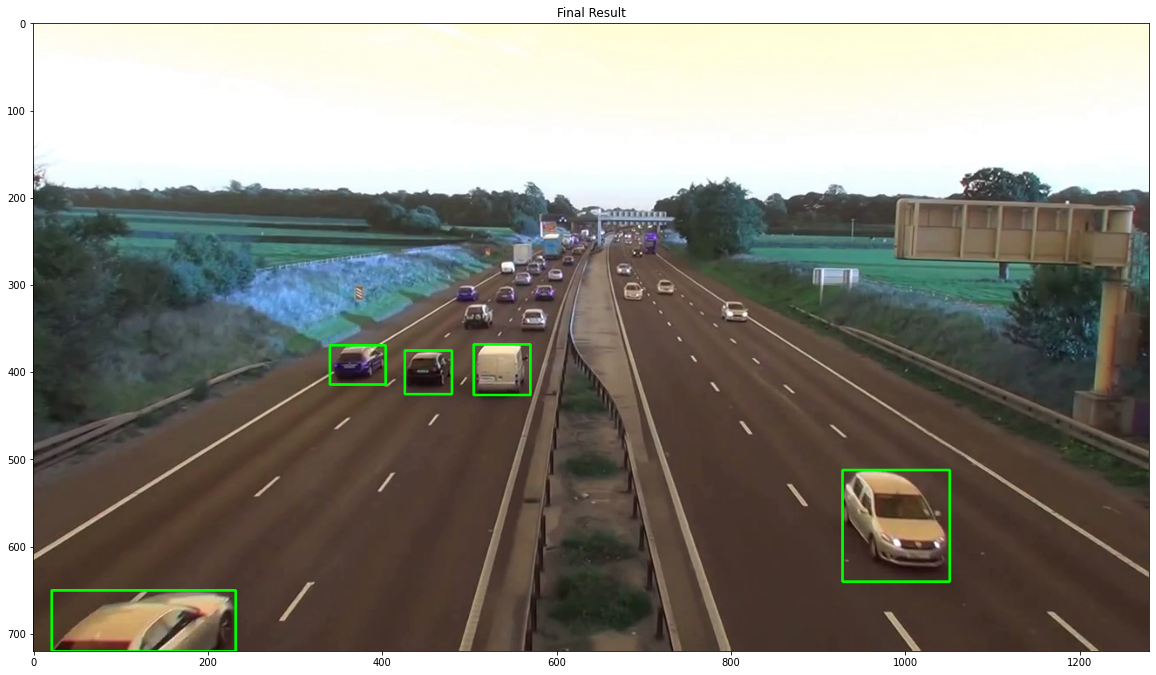

In [19]:
plt.imshow(frame)
plt.title("Final Result")
plt.show()